In [29]:
import pandas as pd
import seaborn as sns

In [30]:
data = pd.read_csv('Hotel_Reviews.csv')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/17,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/17,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/17,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/17,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/17,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [31]:
countries = data.Reviewer_Nationality.unique()
distinctCountries = len(countries)
print("Number of distinct countries :", distinctCountries)

Number of distinct countries : 228


In [32]:
# percentage of reviews of every nation as compared to total number of reviews made
Length = len(data.Reviewer_Nationality)
result = (data.Reviewer_Nationality.value_counts()*100/Length).sort_values(ascending=False)
result

 United Kingdom               47.552439
 United States of America      6.871124
 Australia                     4.204848
 Ireland                       2.874909
 United Arab Emirates          1.984535
 Saudi Arabia                  1.735571
 Netherlands                   1.700864
 Switzerland                   1.682637
 Germany                       1.539735
 Canada                        1.530622
 France                        1.414672
 Israel                        1.281659
 Italy                         1.185486
 Belgium                       1.169392
 Turkey                        1.055575
 Kuwait                        0.953973
 Spain                         0.918490
 Romania                       0.882619
 Russia                        0.756004
 South Africa                  0.740880
 India                         0.666424
 Greece                        0.660413
 China                         0.659249
 Sweden                        0.653045
 New Zealand                   0.627644


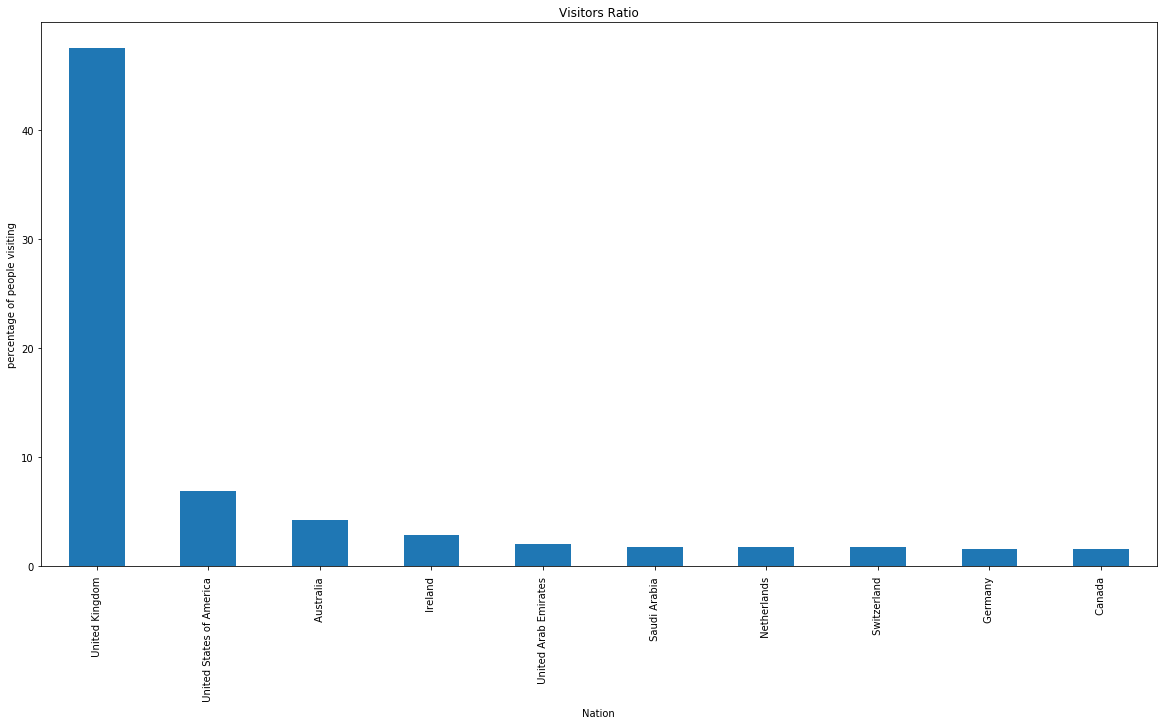

In [33]:
# https://stackoverflow.com/questions/45560108/plotting-graph-using-matplotlib-in-jupyter-ipython-notebook
from matplotlib import pyplot as plt
plt.xlabel('Nation')
plt.ylabel('percentage of people visiting')
plt.title('Visitors Ratio')
result.head(10).plot(kind='bar',figsize=(20,10))
plt.show()

In [34]:
countries = result.head(10).keys()
response=pd.DataFrame(index=range(0,10),columns=['Hotel_Name','positive_rating_percentage','negative_rating_percentage', 'Average_Rating'])
i = 0;
for country in countries:
    place = data[(data['Reviewer_Nationality'] == country)]['Reviewer_Score']
    response.at[i, 'Hotel_Name'] = country
    response.at[i, 'positive_rating_percentage'] = len(place[place >= 6])*100/len(place)
    response.at[i, 'negative_rating_percentage'] = len(place[place < 6])*100/len(place)
    response.at[i, 'Average_Rating'] = place.sum()/place.count()
    i +=1

response = response.sort_values(by = 'positive_rating_percentage', ascending = False)
response

,Hotel_Name,positive_rating_percentage,negative_rating_percentage,Average_Rating
1,United States of America,93.0017,6.99834,8.787
2,Australia,92.7649,7.23508,8.59172
9,Canada,92.0446,7.95541,8.54778
3,Ireland,91.2524,8.74756,8.46405
0,United Kingdom,90.6767,9.32329,8.48635
7,Switzerland,88.4881,11.5119,8.16159
6,Netherlands,88.1327,11.8673,8.12515
8,Germany,87.2182,12.7818,8.13248
4,United Arab Emirates,82.3351,17.6649,7.87883
5,Saudi Arabia,82.2366,17.7634,7.88177


In [35]:
countries = result.head(10).keys()
hotels = (data.groupby('Hotel_Name')['Reviewer_Score'].sum()/data.groupby('Hotel_Name')['Reviewer_Score'].count()).sort_values(ascending=False).head(10)
hotels = hotels.index.tolist()
nations = pd.DataFrame(index = (0, len(countries)), columns = countries)
for nation in nations:
    for i in range (0, len(hotels)):
        score  = data[(data['Reviewer_Nationality'] == nation) & (data['Hotel_Name'] == hotels[i])]['Reviewer_Score']
        nations.at[i, nation] = score.sum()/score.count()
    nations[nation] = nations[nation].astype('float64')
    


/Users/pshriva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


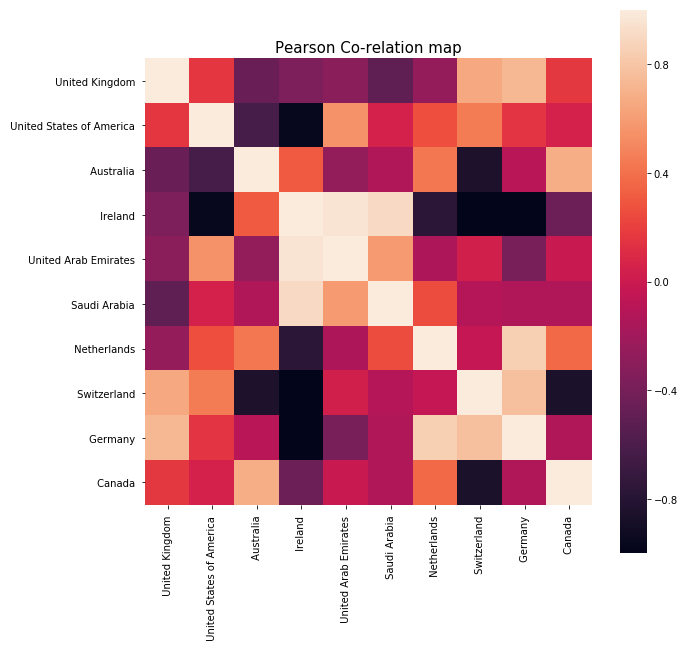

,United Kingdom,United States of America,Australia,Ireland,United Arab Emirates,Saudi Arabia,Netherlands,Switzerland,Germany,Canada
United Kingdom,1.000000,0.366245,-0.542616,-0.699182,-0.561486,-0.756456,0.011373,0.727369,0.690508,-0.196628
United States of America,0.366245,1.000000,-0.675489,-0.534760,0.008546,-0.256985,0.304565,0.704617,0.489088,-0.093818
Australia,-0.542616,-0.675489,1.000000,0.293299,-0.204962,0.067146,0.283247,-0.844464,-0.342851,0.713901
Ireland,-0.699182,-0.534760,0.293299,1.000000,0.668647,0.739785,-0.542399,-0.607493,-0.820926,-0.036170
United Arab Emirates,-0.561486,0.008546,-0.204962,0.668647,1.000000,0.812675,-0.600354,-0.284264,-0.774913,-0.362505
Saudi Arabia,-0.756456,-0.256985,0.067146,0.739785,0.812675,1.000000,-0.295727,-0.398683,-0.657706,-0.330504
Netherlands,0.011373,0.304565,0.283247,-0.542399,-0.600354,-0.295727,1.000000,0.167330,0.617010,0.440671
Switzerland,0.727369,0.704617,-0.844464,-0.607493,-0.284264,-0.398683,0.167330,1.000000,0.771319,-0.521641
Germany,0.690508,0.489088,-0.342851,-0.820926,-0.774913,-0.657706,0.617010,0.771319,1.000000,-0.058753
Canada,-0.196628,-0.093818,0.713901,-0.036170,-0.362505,-0.330504,0.440671,-0.521641,-0.058753,1.000000


In [25]:
corr_df = nations[countries]
corr_df = corr_df.corr(method = 'pearson')
ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_df, vmax = 1., square=True)
plt.title('Pearson Co-relation map', fontsize = 15)
plt.show()
corr_df.corr(method = 'pearson')

